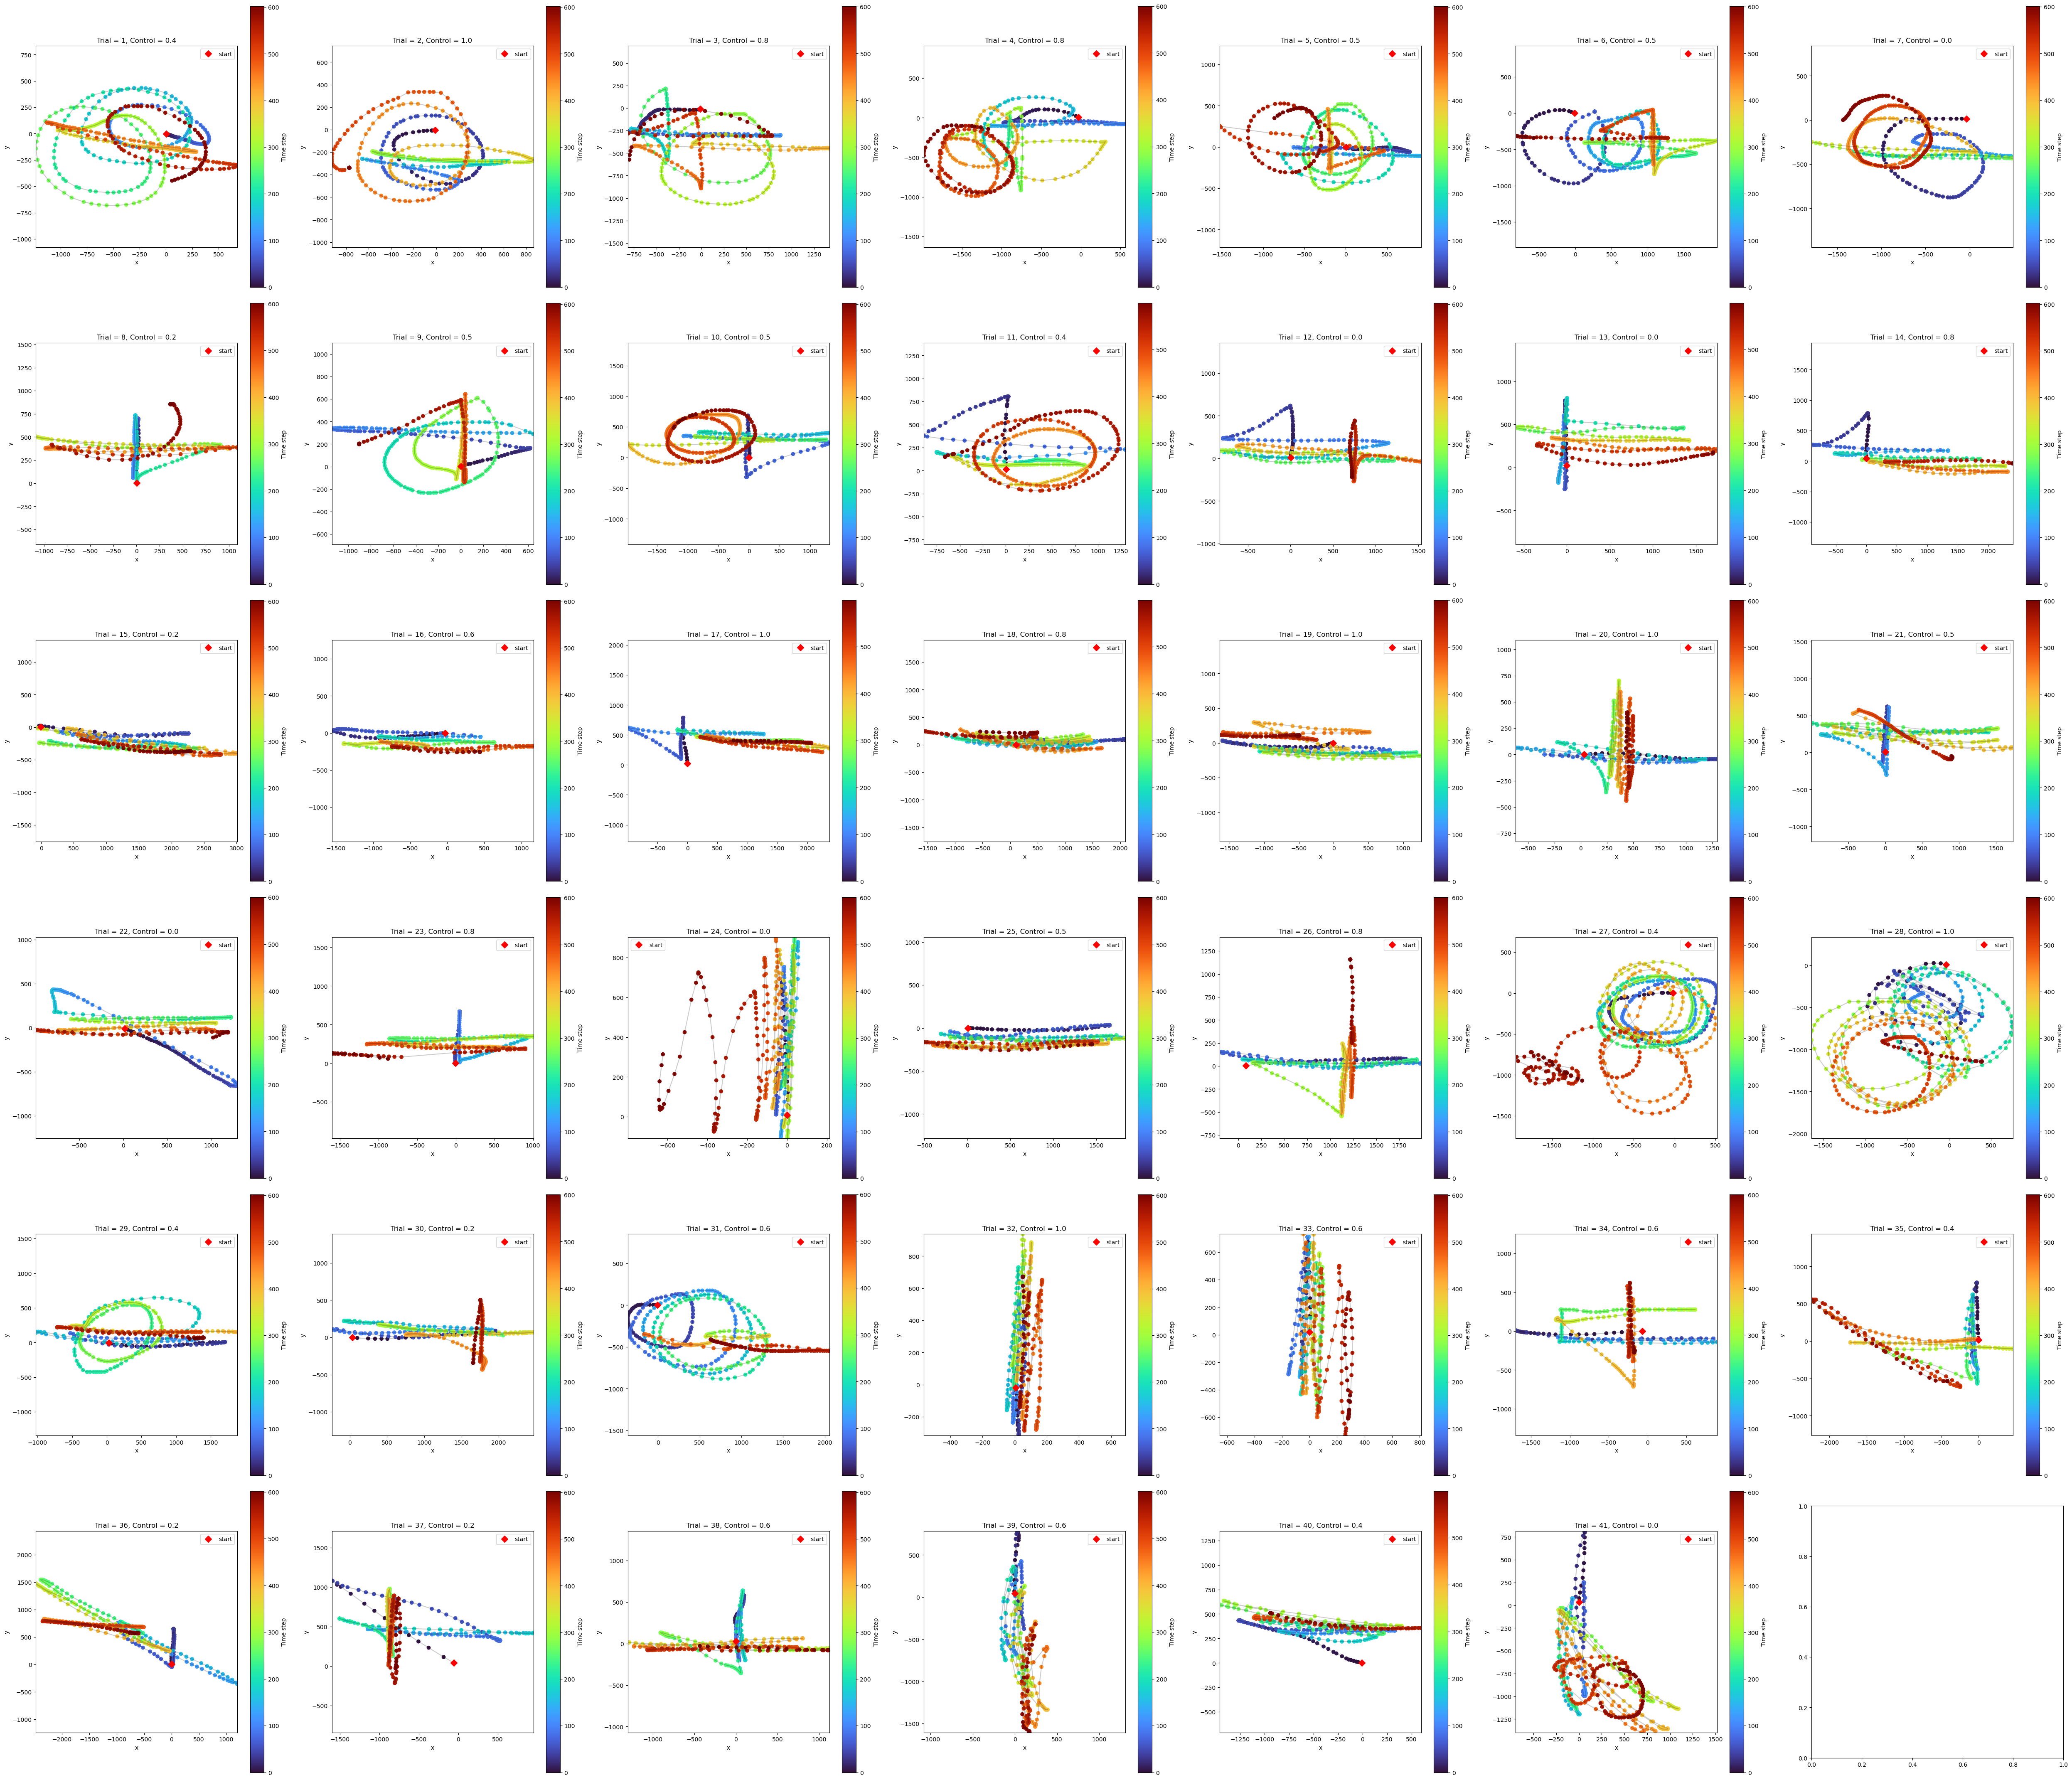

In [18]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# .matファイルからマウスの動きのデータを読み込む
mat_data = loadmat('sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')
# マウスの動きのデータを取得
mouse_movement = mat_data['mouseMovement']
# convert mouseMovement from a 2D array to pandas dataframe
mouse_df = pd.DataFrame(mouse_movement, columns=['trial', 'sample', 'dx', 'dy'])
# Assuming that 'trial' in control_df corresponds to 'trial' in mouse_df
# x 座標と y 座標を計算する
mouse_df['x'] = mouse_df.groupby('trial')['dx'].cumsum()
mouse_df['y'] = mouse_df.groupby('trial')['dy'].cumsum()
mouse_df = mouse_df.reset_index(drop=True)

# CSVファイルからデータを読み込む
control_df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')
# "actual control"を抽出する
actual_control = control_df['actual control']

# traj_withColour関数を使ってプロットを作成する
def traj_withColour(x, y, ax):
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))  # Corrected vmin and vmax values
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Create subplots
num_trials = mouse_df['trial'].nunique()
num_rows = int(np.ceil(np.sqrt(num_trials)))
num_cols = num_rows

# Adjust subplot dimensions to be square
fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for ax in axs.flat:
    ax.set_aspect('equal')
    ax.set_box_aspect(1)

# Reset index for both dataframes
control_df_reset = control_df.reset_index()
mouse_df_reset = mouse_df.reset_index()

# Merge the dataframes on the appropriate columns
merged_df = pd.merge(mouse_df_reset, control_df_reset, left_on='trial', right_on='index')

# For each trial, plot the mouse movement and add the control level to the title
for i, (name, group) in enumerate(merged_df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group['x'].values  # 'x' coordinates
    y = group['y'].values  # 'y' coordinates

    traj_withColour(x, y, ax=axs[row, col])  # Plot using traj_withColour function

    axs[row, col].set_xlim([group['x'].min(), group['x'].max()])
    axs[row, col].set_ylim([group['y'].min(), group['y'].max()])

    control_level = group['actual control'].iloc[0]
    axs[row, col].set_title(f'Trial = {name}, Control = {control_level}')

for i in range(num_trials, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()